<a href="https://colab.research.google.com/github/Tanveer132/Market-Basket-Analysis/blob/main/DrugRecommendation_IPCopiaBrand_IngradientList.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drug Recommendation using Apriori Algorithm

## Data - standard combinations, brand names, company name in India

### Link - 
        
    https://journals.plos.org/plosmedicine/article?id=10.1371/journal.pmed.1001826 
       
**Aproach -**

    1.To use data of different medicines and their manufacturers.
    2.Build rules to suggest different brands for single medicine.

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [140]:
data = pd.read_excel('/content/drug_IndianPharmaCopia.xlsx')
data.head()

,SG CODE,SUBGROUP,SUBGROUP LAUNCH DATE,RANK,BRAND,COMPANY,CORPORATE,DIVISION,INDIAN / MNC,SUPERGROUP,GROUP,CLASS,THERAPY,ACUTE/ CHRONIC,BRAND LAUNCH DATE,Sales UnitNov-2007,Sales UnitDec-2007,Sales UnitJan-2008,Sales UnitFeb-2008,Sales UnitMar-2008,Sales UnitApr-2008,Sales UnitMay-2008,Sales UnitJun-2008,Sales UnitJul-2008,Sales UnitAug-2008,Sales UnitSep-2008,Sales UnitOct-2008,Sales UnitNov-2008,Sales UnitDec-2008,Sales UnitJan-2009,Sales UnitFeb-2009,Sales UnitMar-2009,Sales UnitApr-2009,Sales UnitMay-2009,Sales UnitJun-2009,Sales UnitJul-2009,Sales UnitAug-2009,Sales UnitSep-2009,Sales UnitOct-2009,Sales UnitNov-2009,...,Sales ValJul-2009,Sales ValAug-2009,Sales ValSep-2009,Sales ValOct-2009,Sales ValNov-2009,Sales ValDec-2009,Sales ValJan-2010,Sales ValFeb-2010,Sales ValMar-2010,Sales ValApr-2010,Sales ValMay-2010,Sales ValJun-2010,Sales ValJul-2010,Sales ValAug-2010,Sales ValSep-2010,Sales ValOct-2010,Sales ValNov-2010,Sales ValDec-2010,Sales ValJan-2011,Sales ValFeb-2011,Sales ValMar-2011,Sales ValApr-2011,Sales ValMay-2011,Sales ValJun-2011,Sales ValJul-2011,Sales ValAug-2011,Sales ValSep-2011,Sales ValOct-2011,Sales ValNov-2011,Sales Val Dec-2011,Sales Val Jan-2012,Sales Val Feb-2012,Sales Val Mar-2012,Sales Val Apr-2012,Sales Val May-2012,Sales Val June-2012,Sales Val July-2012,Sales Val Aug-2012,Sales Val Sep-2012,Sales Val Oct-2012
0,A3A20,CAMYLOFIN + DICLOFENAC | A3A20,2003-03-01,1,ANASPAS (NPIL),ABBOTT HEALTHCARE PVT. LTD,ABBOTT + ABBOTT HC + SOLVAY,TRUECARE,MNC,GASTRO INTESTINAL,PLAIN ANTISPASMODICS AND ANTICHOLINERGICS,FUNCTIONAL GASTRO-INTESTINAL DISORDER DRUGS,ALIMENTARY TRACT AND METABOLISM,ACUTE,2003-03-01,7595,5334,6653,8631,6117,17278,7227,49741,68492,44845,44878,72875,62960,54044,48257,44320,63914,85155,85807,85483,89363,95174,81418,81137,64582,...,1752460.11,1810109.78,1584683.46,1571452.14,1336367.48,1535606.45,1267690.08,1357833.40,1320845.88,1802617.14,1832627.31,1949228.46,1970350.08,2182564.80,2036900.89,2111574.10,1613052.48,1596060.32,1352618.44,1386057.53,1697859.80,2763870.86,2079682.93,1806293.89,2176551.92,1922580.92,1585771.69,1287413.03,1462844.12,1163855.06,1051023.52,1410746.70,1484652.08,2946465.95,2594538.66,2859899.62,2728222.18,1410950.90,1442859.00,1329461.43
1,A3A20,CAMYLOFIN + DICLOFENAC | A3A20,2003-03-01,2,SPASMONORM (KHADAWAL),KHANDELWAL LABORATORIES LTD,KHANDELWAL LABORATORIES LTD,GENERIC,INDIAN,GASTRO INTESTINAL,PLAIN ANTISPASMODICS AND ANTICHOLINERGICS,FUNCTIONAL GASTRO-INTESTINAL DISORDER DRUGS,ALIMENTARY TRACT AND METABOLISM,ACUTE,2009-12-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,180233.13,238223.37,238562.85,361140.50,396662.12,494626.60,504723.23,492125.52,650437.33,510858.81,498876.07,524415.68,414545.29,521472.91,539687.58,429232.37,479585.20,682169.64,747138.74,947874.52,968445.35,917135.51,1161701.54,812113.59,739864.92,682191.80,622897.83,661707.62,1120874.24,1517145.11,1554276.11,1301907.98,1938789.50,1198002.32,816628.18
2,A3A20,CAMYLOFIN + DICLOFENAC | A3A20,2003-03-01,3,BIGSPAS D,MANKIND PHARMACEUTICALS LTD.,MANKIND PHARMACEUTICALS LTD.,DISCOVERY,INDIAN,GASTRO INTESTINAL,PLAIN ANTISPASMODICS AND ANTICHOLINERGICS,FUNCTIONAL GASTRO-INTESTINAL DISORDER DRUGS,ALIMENTARY TRACT AND METABOLISM,ACUTE,2010-11-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7042.02,222000.02,290670.00,383093.25,370597.26,612874.89,731009.93,716945.09,855292.76,743483.07,739908.98,582214.92,593197.65,599448.69,532983.66,572368.94,627953.48,678334.80,842391.00,669783.51,964615.08,919672.82,720049.00,679012.84
3,A3A20,CAMYLOFIN + DICLOFENAC | A3A20,2003-03-01,4,ANASPAS,KHANDELWAL LABORATORIES LTD,KHANDELWAL LABORATORIES LTD,RADON,INDIAN,GASTRO INTESTINAL,PLAIN ANTISPASMODICS AND ANTICHOLINERGICS,FUNCTIONAL GASTRO-INTESTINAL DISORDER DRUGS,ALIMENTARY TRACT AND METABOLISM,ACUTE,2004-07-01,92043,84900,66646,66443,80557,96481,59018,37868,43665,31239,24538,27487,29160,30

In [143]:
data.isna().sum()

SG CODE                 0
SUBGROUP                0
SUBGROUP LAUNCH DATE    0
RANK                    0
BRAND                   0
                       ..
Sales Val June-2012     0
Sales Val July-2012     0
Sales Val Aug-2012      0
Sales Val Sep-2012      0
Sales Val Oct-2012      0
Length: 142, dtype: int64

In [144]:
data.columns

Index(['SG CODE', 'SUBGROUP', 'SUBGROUP LAUNCH DATE', 'RANK', 'BRAND',
       'COMPANY', 'CORPORATE', 'DIVISION', 'INDIAN / MNC', 'SUPERGROUP',
       ...
       'Sales Val Jan-2012', 'Sales Val Feb-2012', 'Sales Val Mar-2012',
       'Sales Val Apr-2012', 'Sales Val May-2012', 'Sales Val June-2012',
       'Sales Val July-2012', 'Sales Val Aug-2012', 'Sales Val Sep-2012',
       'Sales Val Oct-2012'],
      dtype='object', length=142)

**Our concern is anly with -**
1. combination (subgroup)
2. Medicine Name (brand)

In [8]:
data = data.loc[:,['SUBGROUP','BRAND','COMPANY','INDIAN / MNC']]
data.head()

,SUBGROUP,BRAND,COMPANY,INDIAN / MNC
0,CAMYLOFIN + DICLOFENAC | A3A20,ANASPAS (NPIL),ABBOTT HEALTHCARE PVT. LTD,MNC
1,CAMYLOFIN + DICLOFENAC | A3A20,SPASMONORM (KHADAWAL),KHANDELWAL LABORATORIES LTD,INDIAN
2,CAMYLOFIN + DICLOFENAC | A3A20,BIGSPAS D,MANKIND PHARMACEUTICALS LTD.,INDIAN
3,CAMYLOFIN + DICLOFENAC | A3A20,ANASPAS,KHANDELWAL LABORATORIES LTD,INDIAN
4,CAMYLOFIN + DICLOFENAC | A3A20,AVAPAR,KHANDELWAL LABORATORIES LTD,INDIAN


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


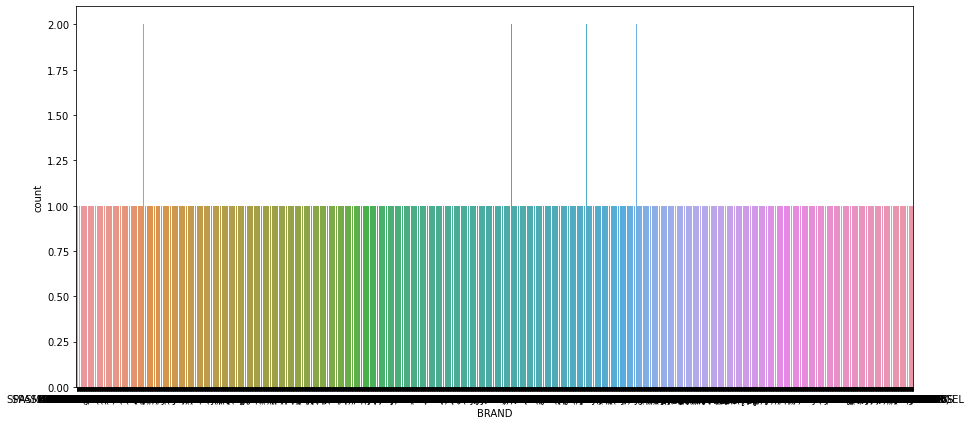

In [145]:
plt.figure(figsize=(15,7))
g=sns.countplot(data['BRAND'])

In [146]:
data[data.groupby('BRAND').count()>1].dropna()

,SG CODE,SUBGROUP,SUBGROUP LAUNCH DATE,RANK,BRAND,COMPANY,CORPORATE,DIVISION,INDIAN / MNC,SUPERGROUP,GROUP,CLASS,THERAPY,ACUTE/ CHRONIC,BRAND LAUNCH DATE,Sales UnitNov-2007,Sales UnitDec-2007,Sales UnitJan-2008,Sales UnitFeb-2008,Sales UnitMar-2008,Sales UnitApr-2008,Sales UnitMay-2008,Sales UnitJun-2008,Sales UnitJul-2008,Sales UnitAug-2008,Sales UnitSep-2008,Sales UnitOct-2008,Sales UnitNov-2008,Sales UnitDec-2008,Sales UnitJan-2009,Sales UnitFeb-2009,Sales UnitMar-2009,Sales UnitApr-2009,Sales UnitMay-2009,Sales UnitJun-2009,Sales UnitJul-2009,Sales UnitAug-2009,Sales UnitSep-2009,Sales UnitOct-2009,Sales UnitNov-2009,...,Sales ValJul-2009,Sales ValAug-2009,Sales ValSep-2009,Sales ValOct-2009,Sales ValNov-2009,Sales ValDec-2009,Sales ValJan-2010,Sales ValFeb-2010,Sales ValMar-2010,Sales ValApr-2010,Sales ValMay-2010,Sales ValJun-2010,Sales ValJul-2010,Sales ValAug-2010,Sales ValSep-2010,Sales ValOct-2010,Sales ValNov-2010,Sales ValDec-2010,Sales ValJan-2011,Sales ValFeb-2011,Sales ValMar-2011,Sales ValApr-2011,Sales ValMay-2011,Sales ValJun-2011,Sales ValJul-2011,Sales ValAug-2011,Sales ValSep-2011,Sales ValOct-2011,Sales ValNov-2011,Sales Val Dec-2011,Sales Val Jan-2012,Sales Val Feb-2012,Sales Val Mar-2012,Sales Val Apr-2012,Sales Val May-2012,Sales Val June-2012,Sales Val July-2012,Sales Val Aug-2012,Sales Val Sep-2012,Sales Val Oct-2012


**Conclusion :**

    We got different brand name/ medicine name for similer combinations too. Which we can use to find association between them and similarity among medicines.

In [15]:
data['SUBGROUP'] = data['SUBGROUP'].apply(lambda x: x.split("|")[0].strip())
data.head()

,SUBGROUP,BRAND,COMPANY,INDIAN / MNC,Transiction
0,CAMYLOFIN + DICLOFENAC,ANASPAS (NPIL),ABBOTT HEALTHCARE PVT. LTD,MNC,"[CAMYLOFIN + DICLOFENAC , ANASPAS (NPIL)]"
1,CAMYLOFIN + DICLOFENAC,SPASMONORM (KHADAWAL),KHANDELWAL LABORATORIES LTD,INDIAN,"[CAMYLOFIN + DICLOFENAC , SPASMONORM (KHADAWAL)]"
2,CAMYLOFIN + DICLOFENAC,BIGSPAS D,MANKIND PHARMACEUTICALS LTD.,INDIAN,"[CAMYLOFIN + DICLOFENAC , BIGSPAS D]"
3,CAMYLOFIN + DICLOFENAC,ANASPAS,KHANDELWAL LABORATORIES LTD,INDIAN,"[CAMYLOFIN + DICLOFENAC , ANASPAS]"
4,CAMYLOFIN + DICLOFENAC,AVAPAR,KHANDELWAL LABORATORIES LTD,INDIAN,"[CAMYLOFIN + DICLOFENAC , AVAPAR]"


**Conclusion :** 
    
    Here we can observe, We got different brands/Medicine names available for same combination.

In [18]:
df = data
df['Transiction'] = df.apply(lambda x: list([x['SUBGROUP'],x['BRAND'].strip()]),axis=1)
df.head()

,SUBGROUP,BRAND,COMPANY,INDIAN / MNC,Transiction
0,CAMYLOFIN + DICLOFENAC,ANASPAS (NPIL),ABBOTT HEALTHCARE PVT. LTD,MNC,"[CAMYLOFIN + DICLOFENAC, ANASPAS (NPIL)]"
1,CAMYLOFIN + DICLOFENAC,SPASMONORM (KHADAWAL),KHANDELWAL LABORATORIES LTD,INDIAN,"[CAMYLOFIN + DICLOFENAC, SPASMONORM (KHADAWAL)]"
2,CAMYLOFIN + DICLOFENAC,BIGSPAS D,MANKIND PHARMACEUTICALS LTD.,INDIAN,"[CAMYLOFIN + DICLOFENAC, BIGSPAS D]"
3,CAMYLOFIN + DICLOFENAC,ANASPAS,KHANDELWAL LABORATORIES LTD,INDIAN,"[CAMYLOFIN + DICLOFENAC, ANASPAS]"
4,CAMYLOFIN + DICLOFENAC,AVAPAR,KHANDELWAL LABORATORIES LTD,INDIAN,"[CAMYLOFIN + DICLOFENAC, AVAPAR]"


In [19]:
df['Transiction'][0]

['CAMYLOFIN + DICLOFENAC', 'ANASPAS (NPIL)']

In [20]:
data=list(data['Transiction'])
data[:2]

[['CAMYLOFIN + DICLOFENAC', 'ANASPAS (NPIL)'],
 ['CAMYLOFIN + DICLOFENAC', 'SPASMONORM (KHADAWAL)']]

In [23]:
te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
trans_df = pd.DataFrame(te_ary, columns=te.columns_)
trans_df.head()

,3D PLUS,A 3,AARTHER P,ABATE,ABATE CZ,ABDROT PLUS,AC MR,AC PARA,AC PC,AC SERA,ACCECLOWOC MR,ACCECLOWOC P,ACCECLOWOC SP,ACCEDE P,ACCEMOL,ACCETIZ,ACCETIZ P,ACE P,ACE PLUS (GOLD LINE),ACE PROXYVON,ACEBID CZ,ACEBID PLUS,ACEBLOC P,ACECHOS P,ACECLO MR,ACECLO PLUS,ACECLO SERA,ACECLOACE P,ACECLOCARE P,ACECLODUS P,ACECLOF MR,ACECLOFENAC + BETACYCLODEXTRINE,ACECLOFENAC + CHLORZOXAZONE,ACECLOFENAC + DIACEREIN,ACECLOFENAC + MISOPROSTOL,ACECLOFENAC + PARACETAMOL,ACECLOFENAC + PARACETAMOL + CHLORZOXAZONE,ACECLOFENAC + PARACETAMOL + RABEPRAZOLE,ACECLOFENAC + PARACETAMOL + SERRATIOPEPTIDASE,ACECLOFENAC + PARACETAMOL + SERRATIOPEPTIDASE + TIZANIDINE,...,ZIDIUM SPAS,ZINASE A,ZINASE AP,ZINASE BD,ZINASE D,ZINASE DP,ZITA,ZITA (GENESIS),ZIX MR OD,ZIX P,ZIX R,ZIX RP,ZIX S,ZIX S PLUS,ZOBID R,ZOFEN PLUS,ZOFEN SP,ZOFLAM,ZOFLEX,ZOGESIC,ZOGESIC PLUS,ZOLANDIN MR,ZONEX MR,ZONEX P,ZONEX PLUS,ZONIM PLUS,ZORNICA PLUS,ZOTADASE K,ZOTAFLAM,ZOVERAN,ZOX (WOCKHARDT),ZOXAPAR,ZULU,ZULU FORTE,ZULU-V,ZUPAR,ZYMASE D,ZYNAC PLUS,ZYNAC-P,ZYNAC-SP
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
def convert_into_binary(x):
    if x == True:
        return 1
    else:
        return 0
    
trans_df = trans_df.applymap(convert_into_binary)

trans_df.head()

,3D PLUS,A 3,AARTHER P,ABATE,ABATE CZ,ABDROT PLUS,AC MR,AC PARA,AC PC,AC SERA,ACCECLOWOC MR,ACCECLOWOC P,ACCECLOWOC SP,ACCEDE P,ACCEMOL,ACCETIZ,ACCETIZ P,ACE P,ACE PLUS (GOLD LINE),ACE PROXYVON,ACEBID CZ,ACEBID PLUS,ACEBLOC P,ACECHOS P,ACECLO MR,ACECLO PLUS,ACECLO SERA,ACECLOACE P,ACECLOCARE P,ACECLODUS P,ACECLOF MR,ACECLOFENAC + BETACYCLODEXTRINE,ACECLOFENAC + CHLORZOXAZONE,ACECLOFENAC + DIACEREIN,ACECLOFENAC + MISOPROSTOL,ACECLOFENAC + PARACETAMOL,ACECLOFENAC + PARACETAMOL + CHLORZOXAZONE,ACECLOFENAC + PARACETAMOL + RABEPRAZOLE,ACECLOFENAC + PARACETAMOL + SERRATIOPEPTIDASE,ACECLOFENAC + PARACETAMOL + SERRATIOPEPTIDASE + TIZANIDINE,...,ZIDIUM SPAS,ZINASE A,ZINASE AP,ZINASE BD,ZINASE D,ZINASE DP,ZITA,ZITA (GENESIS),ZIX MR OD,ZIX P,ZIX R,ZIX RP,ZIX S,ZIX S PLUS,ZOBID R,ZOFEN PLUS,ZOFEN SP,ZOFLAM,ZOFLEX,ZOGESIC,ZOGESIC PLUS,ZOLANDIN MR,ZONEX MR,ZONEX P,ZONEX PLUS,ZONIM PLUS,ZORNICA PLUS,ZOTADASE K,ZOTAFLAM,ZOVERAN,ZOX (WOCKHARDT),ZOXAPAR,ZULU,ZULU FORTE,ZULU-V,ZUPAR,ZYMASE D,ZYNAC PLUS,ZYNAC-P,ZYNAC-SP
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
#call apriori function and pass minimum support here we are passing 3%. 
# means 3 times in total number of transaction that item was present.

frequent_itemsets = apriori(trans_df, min_support=0.0001, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.000346,(3D PLUS)
1,0.000346,(A 3)
2,0.000346,(AARTHER P)
3,0.000346,(ABATE)
4,0.000346,(ABATE CZ)
...,...,...
5903,0.000346,"(VALDECOXIB + TIZANIDINE, VALUS-XT)"
5904,0.000346,"(VORTH XT, VALDECOXIB + TIZANIDINE)"
5905,0.000346,"(VALDECOXIB + TIZANIDINE, ZULU-V)"
5906,0.000346,"(ZALTOPROFEN, ZALTO)"


In [94]:
# We have association rules which need to put on frequent itemset
# setting threshold with lift 
rules_mlxtend = association_rules(frequent_itemsets, metric = 'lift', min_threshold=10)
rules_mlxtend

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(DICLOFENAC + PARACETAMOL),(3D PLUS),0.100000,0.000346,0.000346,0.003460,10.000000,0.000311,1.003125
1,(3D PLUS),(DICLOFENAC + PARACETAMOL),0.000346,0.100000,0.000346,1.000000,10.000000,0.000311,inf
2,(ACECLOFENAC + PARACETAMOL + CHLORZOXAZONE),(ABATE CZ),0.023875,0.000346,0.000346,0.014493,41.884058,0.000338,1.014355
3,(ABATE CZ),(ACECLOFENAC + PARACETAMOL + CHLORZOXAZONE),0.000346,0.023875,0.000346,1.000000,41.884058,0.000338,inf
4,(DROTAVERINE + MEFENAMIC ACID),(ABDROT PLUS),0.014187,0.000346,0.000346,0.024390,70.487805,0.000341,1.024645
...,...,...,...,...,...,...,...,...,...
4527,(ZULU-V),(VALDECOXIB + TIZANIDINE),0.000346,0.003460,0.000346,1.000000,289.000000,0.000345,inf
4528,(ZALTOPROFEN),(ZALTO),0.000692,0.000346,0.000346,0.500000,1445.000000,0.000346,1.999308
4529,(ZALTO),(ZALTOPROFEN),0.000346,0.000692,0.000346,1.000000,1445.000000,0.000346,inf
4530,(ZALTOPROFEN),(ZALTOKIN),0.000692,0.000346,0.000346,0.500000,1445.000000,0.000346,1.999308


In [95]:
rules_mlxtend.tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4527,(ZULU-V),(VALDECOXIB + TIZANIDINE),0.000346,0.003460,0.000346,1.0,289.0,0.000345,inf
4528,(ZALTOPROFEN),(ZALTO),0.000692,0.000346,0.000346,0.5,1445.0,0.000346,1.999308
4529,(ZALTO),(ZALTOPROFEN),0.000346,0.000692,0.000346,1.0,1445.0,0.000346,inf
4530,(ZALTOPROFEN),(ZALTOKIN),0.000692,0.000346,0.000346,0.5,1445.0,0.000346,1.999308
4531,(ZALTOKIN),(ZALTOPROFEN),0.000346,0.000692,0.000346,1.0,1445.0,0.000346,inf


In [96]:
# Get maximum confidence and lift
print(rules_mlxtend['confidence'][rules_mlxtend['confidence']==max(rules_mlxtend['confidence'])])

print(rules_mlxtend['lift'][rules_mlxtend['lift']==max(rules_mlxtend['lift'])])

1       1.0
3       1.0
5       1.0
6       1.0
9       1.0
       ... 
4523    1.0
4524    1.0
4527    1.0
4529    1.0
4531    1.0
Name: confidence, Length: 2295, dtype: float64
14      2890.0
15      2890.0
34      2890.0
35      2890.0
52      2890.0
         ...  
4385    2890.0
4442    2890.0
4443    2890.0
4450    2890.0
4451    2890.0
Name: lift, Length: 80, dtype: float64


In [97]:
#Convert frozenset objects into string
rules_mlxtend["antecedents"] = rules_mlxtend["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode")
rules_mlxtend["consequents"] = rules_mlxtend["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode")

In [136]:
prescribed_item = ['AVAPAR']
subsitutes=rules_mlxtend['consequents'].loc[(rules_mlxtend['antecedents'].isin(prescribed_item))]
subsitutes=list(subsitutes)
subsitutes=rules_mlxtend['consequents'].loc[(rules_mlxtend['antecedents'].isin(subsitutes))]

In [138]:
print("You Have prescribed",prescribed_item ,"\nYou can have some substitutes  -> ",subsitutes.values ," !!!")

You Have prescribed ['AVAPAR'] 
You can have some substitutes  ->  ['ANASPAS' 'ANASPAS (NPIL)' 'AVAPAR' 'BIGSPAS D' 'DICLORAN SPAS'
 'SPASMONORM (KHADAWAL)']  !!!


**Conclusion :**

    We can observe here, When Doctors prescribes any medicine then he will have list of subsitutes of that medicine.

You Have prescribed ['AVAPAR'] 
You can have some substitutes  ->  ['ANASPAS' 'ANASPAS (NPIL)' 'AVAPAR' 'BIGSPAS D' 'DICLORAN SPAS'
 'SPASMONORM (KHADAWAL)']  !!!